<a href="https://colab.research.google.com/github/amevada9/cs159-final-project/blob/main/dembski_train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Model with Representation Tracking

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
BASE_DIR = "drive/MyDrive/"

In [3]:
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import shape as s
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [6]:
# Define parameters of some images
DIM = 200

In [7]:
class AlexNet(Sequential):
    '''
    Here is an implementation of AlexNet in Tensorflow.
    I have a lot of experience with AlexNet and it works pretty
    well for most things. We can train from scratch or we can get the 
    pretrained ImageNet weights from the Internet and do stuff with it

    We can also use networks ike VGG16 and ResNet (I think ResNet is classification)
    and do similar things, we can just get those implemnetations there. 
    '''
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11, 11), strides=4,
                        padding='valid', activation='relu',
                        input_shape=input_shape,
                        kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                              padding='valid', data_format=None))

        self.add(Conv2D(256, kernel_size=(5, 5), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                              padding='valid', data_format=None))

        self.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(Conv2D(256, kernel_size=(3, 3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                              padding='valid', data_format=None))

        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(num_classes, activation='softmax'))


In [8]:
class AlexNet_Input_to_Kernels(Sequential):
    '''
    H
    '''
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11, 11), strides=4,
                        padding='valid', activation='relu',
                        input_shape=input_shape,
                        kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                              padding='valid', data_format=None))

        self.add(Conv2D(256, kernel_size=(5, 5), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                              padding='valid', data_format=None))

        self.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(Conv2D(256, kernel_size=(3, 3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                              padding='valid', data_format=None))
        self.add(Flatten(input_shape=(6, 6, 256)))
        # self.add(Dense(4096, activation='relu'))
#         self.add(Dropout(0.5))
#         self.add(Dense(4096, activation= 'relu'))
#         self.add(Dropout(0.5))


In [9]:
DIM = 227
img_size = (DIM, DIM)
image_height = DIM
image_width = DIM

IMG_FOLDER_PATH = BASE_DIR + "organized pics/"# Add training set here
# IMG_VAL_PATH = ""# Add validation set here
# IMG_TEST_PATH = ""# Add test set here

BATCH_SIZE = 16 

data_generator = ImageDataGenerator(rescale=1.0/255.0)
data_iter = tf.keras.utils.image_dataset_from_directory(IMG_FOLDER_PATH,
                                                labels='inferred',
                                                label_mode='categorical' ,
                                                class_names=['fourseam', 'curve', 'twoseam', 'change', 'slider'],
                                                color_mode='rgb',
                                                batch_size=BATCH_SIZE,
                                                image_size=(DIM, DIM),
                                                shuffle=True,
                                                seed=1,
                                                validation_split=0.1,
                                                subset="training",
                                                interpolation='bilinear',
                                                follow_links=False,
                                                crop_to_aspect_ratio=False

                                               )
val_data_iter = tf.keras.utils.image_dataset_from_directory(IMG_FOLDER_PATH,
                                                labels='inferred',
                                                label_mode='categorical' ,
                                                class_names=['fourseam', 'curve', 'twoseam', 'change', 'slider'],
                                                color_mode='rgb',
                                                batch_size=BATCH_SIZE,
                                                image_size=(DIM, DIM),
                                                shuffle=True,
                                                seed=1,
                                                validation_split=0.1,
                                                subset="validation",
                                                interpolation='bilinear',
                                                follow_links=False,
                                                crop_to_aspect_ratio=False

                                               )
# val_data_iter = data_generator.flow_from_directory(IMG_VAL_PATH,
#                                                    target_size=img_size,
#                                                    color_mode="rgb",
#                                                    batch_size=1,
#                                                    shuffle=False,
#                                                    class_mode="categorical"
#                                                    )

# test_data_iter = data_generator.flow_from_directory(IMG_TEST_PATH,
#                                                     target_size=img_size,
#                                                     color_mode="rgb",
#                                                     batch_size=1,
#                                                     shuffle=False,
#                                                     class_mode="categorical"
#                                                     )


Found 1006 files belonging to 5 classes.
Using 906 files for training.
Found 1006 files belonging to 5 classes.
Using 100 files for validation.


In [10]:
labels = data_iter.
top_0 = max(np.where(labels == 0)[0])
top_1 = max(np.where(labels == 1)[0])
top_2 = max(np.where(labels == 2)[0])
top_3 = max(np.where(labels == 3)[0])

labels[top_0]

SyntaxError: ignored

In [11]:
# We will build a custom training loop to see how the process works
# we compile it, load the weights
# model = AlexNet((DIM, DIM, 3), 4)
# model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
#               loss="categorical_crossentropy", metrics=["accuracy"])
# model.summary()

In [12]:
def visualize_representation(input, title=""):
    #input = np.reshape(input, (len(input), 1))
    for i in [60, 200, 350, 550]:
        val = input[i]
        plt.figure()
        plt.bar(x=[i for i in range(1, 4097)], height=val)
        plt.title(title)
        plt.tight_layout()
        plt.show()

In [13]:
# Model Evaluation Utils 
def evaluate_model(dataX, dataY, n_folds=5):
    '''
    Function that trains and evaluates a model 
    '''
    scores, histories = list(), list()
    # define model
    model = define_model()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    counter = 1
    for train_ix, test_ix in kfold.split(dataX):
        print('Beginning Fold: ' + str(counter))
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs = 5, batch_size=32, validation_data=(testX, testY), verbose=1)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=1)
        print()
        print('> %.3f' % (acc * 100.0))
        print()
        # append scores
        scores.append(acc)
        histories.append(history)
        counter += 1
    return model, scores, histories

def summarize_diagnostics(history):
    ''' 
    Function that takes in the history object that model.fit() throws out,
    and unpacks it to plot the Cross Entropy Loss and Accuracy of the model
    Useful to compare the Training and Validation Set
    '''
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='Training Set')
    plt.plot(history.history['val_loss'], color='orange', label='Validation Set')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.legend()

    # plot accuracy
    plt.subplot(212)
    plt.ylim(0.5, 1.0)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='Training Set')
    plt.plot(history.history['val_accuracy'], color='orange', label='Validation Set')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch 1/10
57/57 [==============================] - 165s 2s/step - loss: 146.1738 - accuracy: 0.2638 - val_loss: 2.8820 - val_accuracy: 0.3300
Epoch 2/10
57/57 [==============================] - 16s 255ms/step - loss: 3.8456 - accuracy: 0.3609 - val_loss: 1.3258 - val_accuracy: 0.4600
Epoch 3/10
57/57 [==============================] - 11s 166ms/step - loss: 1.3529 - accuracy: 0.5419 - val_loss: 0.3871 - val_accuracy: 0.9000
Epoch 4/10
57/57 [==============================] - 16s 257ms/step - loss: 0.6944 - accuracy: 0.7384 - val_loss: 0.1282 - val_accuracy: 0.9900
Epoch 5/10
57/57 [==============================] - 12s 184ms/step - loss: 0.4457 - accuracy: 0.8411 - val_loss: 0.0743 - val_accuracy: 0.9800
Epoch 6/10
57/57 [==============================] - 12s 180ms/step - loss: 0.1773 - accuracy: 0.9404 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 7/10
57/57 [==============================] - 11s 165ms/step - loss: 0.1129 - accuracy: 0.9691 - val_loss: 0.0167 - val_accuracy: 1.0000

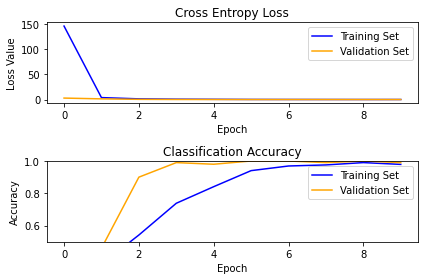

In [14]:
# We can train the network normally for speed and accraucy testing here
model = AlexNet((DIM, DIM, 3), 5)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss="categorical_crossentropy", metrics=["accuracy"])

EPOCHS = 10
hist = model.fit(data_iter, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_data_iter)

summarize_diagnostics(hist)

In [15]:
# We will build a custom training loop to see how the process works
# we compile it, load the weights
model = AlexNet((DIM, DIM, 3), 5)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss="categorical_crossentropy", metrics=["accuracy"])

EPOCHS = 10
layers = [layer.name for layer in model.layers]

iteration_representations = {}
for epoch in range(EPOCHS):
    print(f"Iteration {epoch + 1}")
    hist = model.fit(data_iter, epochs=1, batch_size=BATCH_SIZE, validation_data=val_data_iter)

    layer_cut = 9

    model1 = AlexNet_Input_to_Kernels((DIM, DIM, 3))

    for i in range(0, layer_cut):
        model1.layers[i].set_weights(model.layers[i].get_weights())

    # Now we can take the outputs from the cut model

    outputs = model1.predict(data_iter)
    print(f"Length of Outputs: {outputs.shape}")
    
    iteration_representations[epoch + 1] = outputs

    #visualize_representation(outputs)

Iteration 1
57/57 [==============================] - 11s 167ms/step - loss: 125.5092 - accuracy: 0.2417 - val_loss: 3.2874 - val_accuracy: 0.4900
Length of Outputs: (906, 9216)
Iteration 2
57/57 [==============================] - 12s 177ms/step - loss: 4.3750 - accuracy: 0.3355 - val_loss: 0.6766 - val_accuracy: 0.7200
Length of Outputs: (906, 9216)
Iteration 3
57/57 [==============================] - 13s 208ms/step - loss: 1.3606 - accuracy: 0.5375 - val_loss: 0.4695 - val_accuracy: 0.8600
Length of Outputs: (906, 9216)
Iteration 4
57/57 [==============================] - 12s 182ms/step - loss: 0.7778 - accuracy: 0.7097 - val_loss: 0.3054 - val_accuracy: 0.9100
Length of Outputs: (906, 9216)
Iteration 5
57/57 [==============================] - 11s 164ms/step - loss: 0.4757 - accuracy: 0.8223 - val_loss: 0.1201 - val_accuracy: 0.9800
Length of Outputs: (906, 9216)
Iteration 6
57/57 [==============================] - 10s 163ms/step - loss: 0.2588 - accuracy: 0.8951 - val_loss: 0.0655 - 

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
ps = pca.fit_transform(outputs)

In [42]:
#plots the data in two dimensions for visualization using pca
#assumes there are 4 different types of pitches - we can alter this later if needed
#labels are just t0 for type 0 and t1 for type 2 etc.  Will change this as needed


#paramaters:  data is either val_data_iter or data_iter
#model should just be model1

def plotpoints(data, model, classes):
  types = [[] for _ in range(len(classes))]

  for item in data:
    outputs = model.predict(item[0])
    labels = item[1]
    for x, y in zip(outputs, labels):
      for i, lab in enumerate(y):
        if int(lab) == 1:
          types[i].append(x)

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  colors = ['r', 'g', 'b', 'm', 'c']
  for pitch, color in zip(types,colors):
      ps = pca.fit_transform(pitch)
      x = [item[0] for item in ps.tolist()]
      y = [item[1] for item in ps.tolist()]
      ax.scatter(x, y, c = color)

  ax.legend(classes)

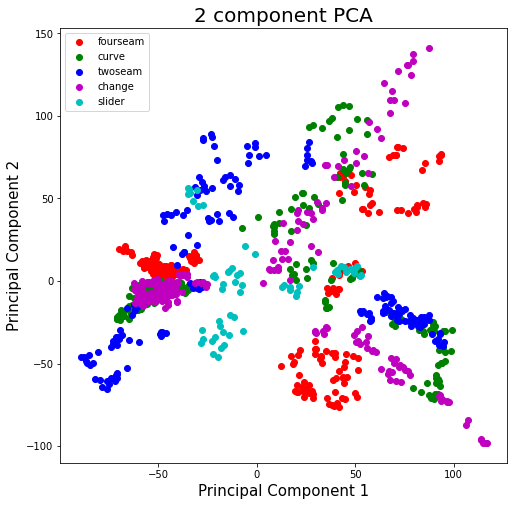

In [43]:

plotpoints(data_iter, model1, ['fourseam', 'curve', 'twoseam', 'change', 'slider'])

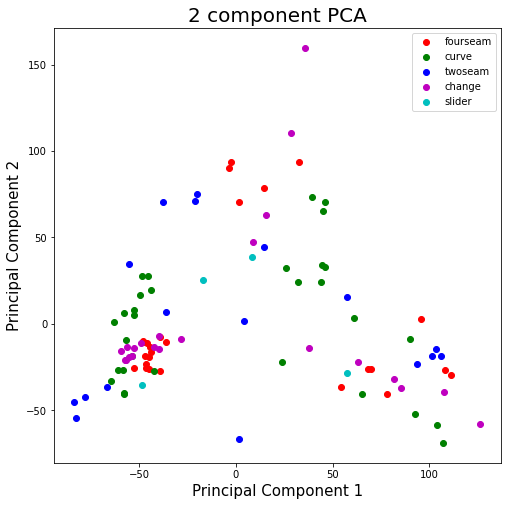

In [44]:
plotpoints(val_data_iter, model1, ['fourseam', 'curve', 'twoseam', 'change', 'slider'])

In [26]:
classes = ['arya4s', 'aryach', 'aryacu', 'aryas', 'jack2s', 'jack4s', 'jackch', 'jackcu', 'steve2s', 'steve4s', 'stevech', 'stevecu', 'will2s', 'will4s', 'willch', 'willcu']

mapping = {i: classes[i] for i in range(len(classes))}


IMG_FOLDER_PATH = BASE_DIR + "byperson/"# Add training set here
all_data = tf.keras.utils.image_dataset_from_directory(IMG_FOLDER_PATH,
                                                labels='inferred',
                                                label_mode='categorical' ,
                                                class_names=classes,
                                                color_mode='rgb',
                                                batch_size=BATCH_SIZE,
                                                image_size=(DIM, DIM),
                                                shuffle=True,
                                                seed=1,
                                                validation_split=0.001,
                                                subset="training",
                                                interpolation='bilinear',
                                                follow_links=False,
                                                crop_to_aspect_ratio=False

                                               )




Found 1006 files belonging to 16 classes.
Using 1005 files for training.


In [37]:
#same thing as plot points except that we are trying to plot by person and pitch type
#this could be kinda hard

def plotpoints2(data, model, classes):
  types = [[] for _ in range(len(classes))]

  for item in data:
    outputs = model.predict(item[0])
    labels = item[1]
    for x, y in zip(outputs, labels):
      for i, lab in enumerate(y):
        if int(lab) == 1:
          types[i].append(x)

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  colors = ['r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'm', 'm', 'm', 'm']
  markers = ['x', 'o', 'v', 'd']
  count = 0
  for pitch, color in zip(types,colors):
      print(count)
      ps = pca.fit_transform(pitch)
      x = [item[0] for item in ps.tolist()]
      y = [item[1] for item in ps.tolist()]
      ax.scatter(x, y, c = colors[count], marker = markers[count%4])
      count += 1

  ax.legend(classes)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


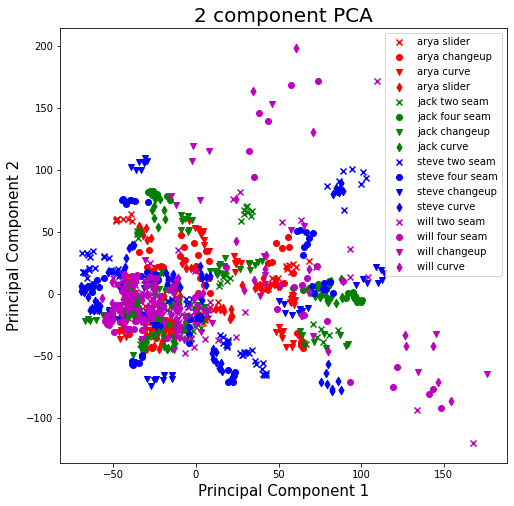

In [39]:
names =  ['arya slider', 'arya changeup', 'arya curve', 'arya slider', 'jack two seam', 'jack four seam', 'jack changeup', 
          'jack curve', 'steve two seam', 'steve four seam', 'steve changeup', 'steve curve', 'will two seam', 'will four seam', 'will changeup', 'will curve']


plotpoints2(all_data, model1, names)